In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import preprocessing, ensemble
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
% matplotlib inline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc
from sklearn.cross_validation import cross_val_score, StratifiedKFold

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dfpa1 = pd.read_csv('/Users/Red/Desktop/GA/Capstone/project_capstone/State_Structurally_Deficient_Bridges_Let_CY_2015-2020_Transportation.csv')
dfpa2 = pd.read_csv('/Users/Red/Desktop/GA/Capstone/project_capstone/Pennsylvania_Bridges.csv')
dfm = pd.read_csv('/Users/Red/Desktop/GA/Capstone/project_capstone/BridgesMass.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,10,19,33,34,35,42,82,85,96,115,134,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def eda(dataframe):
    # Thank god for ritika's function
    print "Missing Values \n \n", dataframe.isnull().sum(),"\n"
    print "Duplicate Rows \n", dataframe.duplicated().sum(),"\n"
    print "Dataframe Types \n \n", dataframe.dtypes,"\n"
    print "Dataframe Shape \n", dataframe.shape,"\n"
    print "Dataframe Describe \n \n", dataframe.describe(include='all'),"\n"
    for feature in dataframe:
        print feature
        print dataframe[feature].nunique()

In [4]:
def eda_helper(df):
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. Columns with no nulls are generally more interesting
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        # This is useful for seeing how interesting the column might be as a feature
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        #dict_.update({"score" : match[1]})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    #eda_df = eda_df.sort_values(['null_count','unique_count'], ascending=[True, False])
    return eda_df

In [5]:
eda(dfm)

Missing Values 
 
X                                     0
Y                                     0
OBJECTID                              0
Bridge_Department_Number              0
Bridge_Name                        6450
Bridge_Identification_Number__B       0
Highway_Agency_District               0
Town                                  0
Latitude                              0
Longitude                             0
Feature_Intersected                   0
Facility_Carried                      0
Structure_Material                    0
Structure_Type                        0
Year_Built                            0
Year_Reconstructed                    0
Type_of_Service                     526
Structure_Length                      0
Bridge_Owner                          0
Structurally_Deficient                0
BridgeInspectionDate                  0
Posted                              123
Structure_Category                    0
GlobalID                              0
created_user          

In [6]:
eda(dfpa1)

Missing Values 
 
Count                                   0
Bridge Key                              0
County                                  0
Bridge ID                               0
Location Structure Name                 0
Feature Carried                         0
Feature Intersected                     0
Owner Code                              1
Length                                  0
Deck Area                               0
Number of Sections                      0
Structure Type                          0
Year Built                              0
Post Status                             0
Weight Limit Single(Tons)               0
Weight Limit Comb(Tons)                 0
Weight Limit Other(Tons)                0
Condition Rating – Deck                 0
Condition Rating - Super                0
Condition Rating – Sub Structure        0
Condition Rating – Culv                 0
Structurally Deficient                  0
Functionally Obsolete                   0
Sufficiency Rati

In [7]:
eda(dfpa2)

Missing Values 
 
X                        0
Y                        0
OBJECTID                 0
CTY_CODE                 0
ST_RT_NO                 0
SEG_NO                  20
OFFSET                  18
ADMIN_JURIS            789
DEC_LAT                108
DEC_LONG               101
BRIDGE_ID                0
FEATINT                 20
DISTRICT                 0
FACILITY                36
LOCATION                 7
OWNER                    0
YEARBUILT               69
YEARRECON             7370
SERVTYPON                0
SERVTYPUND               1
MAINSPANS              295
APPSPANS               300
LENGTH                 275
DECKWIDTH              610
DKSURFTYPE            1535
DKMEMBTYPE            1432
DKPROTECT             1423
MAIN_WS_THICKNESS     1903
APPR_DKSURFTYPE      36754
APPR_DKMEMBTYPE      36803
                     ...  
DEFHWY                1515
DIRSUFFIX             1324
FUNCCLASS             1015
HCLRINV               2409
KIND_HWY              1171
KMPOST    

RAILRATING
10
SCOURCRIT
12
STRRATING
19
TRANSRATIN
10
UNDERCLR
11
WATERADEQ
10
BUS_PLAN_NETWORK
9
P3_INDICATOR
2
ROW_MODIFIED
265
BRKEY
38490


In [8]:
eda_helper(dfm)

,data_type,null_count,unique_count
X,{float64},0,7501
Y,{float64},0,7501
OBJECTID,{int64},0,7554
Bridge_Department_Number,{str},0,6868
Bridge_Name,"{float, str}",6450,968
Bridge_Identification_Number__B,{str},0,7554
Highway_Agency_District,{int64},0,6
Town,{str},0,346
Latitude,{float64},0,7321
Longitude,{float64},0,7374


In [9]:
eda_helper(dfpa2)

,data_type,null_count,unique_count
X,{float64},0,38205
Y,{float64},0,37761
OBJECTID,{int64},0,38490
CTY_CODE,{int64},0,67
ST_RT_NO,{int64},0,1246
SEG_NO,"{int, float, str}",20,2867
OFFSET,{float64},18,4312
ADMIN_JURIS,"{float, str}",789,12
DEC_LAT,{float64},108,17833
DEC_LONG,{float64},101,26189


In [9]:
dfpa3['DEPT_MAIN_MATERIAL_TYPE'] = dfpa2['DEPT_MAIN_MATERIAL_TYPE'].replace({1: 'Steel', 2: 'Concrete (Cast In Place)', 3: 'Concrete (Precast)', 4: 'Prestressed precast Concrete', 
                                          5: 'Timber', 6: 'Masonry', 7: 'Aluminum, wrought iron, cast iron', 8: 'Concrete encased steel', 9: 'Other'})

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
dfpa2['MATERIALS_NAME'] = dfpa3

In [12]:
dfpa2.columns

Index([u'X', u'Y', u'OBJECTID', u'CTY_CODE', u'ST_RT_NO', u'SEG_NO', u'OFFSET',
       u'ADMIN_JURIS', u'DEC_LAT', u'DEC_LONG',
       ...
       u'SCOURCRIT', u'STRRATING', u'TRANSRATIN', u'UNDERCLR', u'WATERADEQ',
       u'BUS_PLAN_NETWORK', u'P3_INDICATOR', u'ROW_MODIFIED', u'BRKEY',
       u'MATERIALS_NAME'],
      dtype='object', length=155)

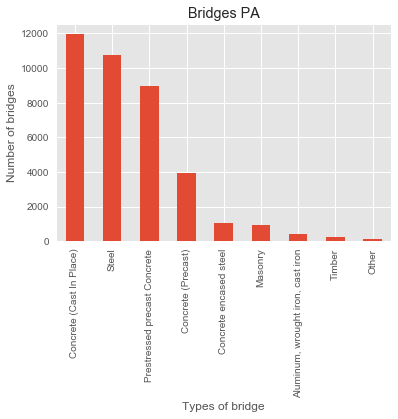

In [13]:
dfpa2.MATERIALS_NAME.value_counts().plot(kind="bar")
plt.title("Bridges PA")
plt.xlabel("Types of bridge")
plt.ylabel("Number of bridges")

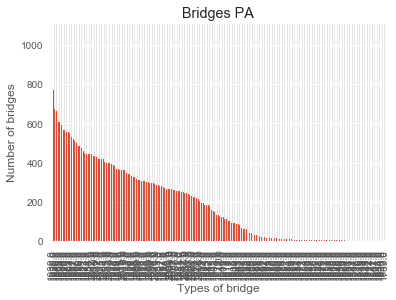

In [14]:
dfpa2.YEARBUILT.value_counts().plot(kind="bar")
plt.title("Bridges PA")
plt.xlabel("Types of bridge")
plt.ylabel("Number of bridges")

In [15]:
# dfpa4.groupby('MATERIALS_NAME').YEARBUILT.value_counts().plot(kind='bar', color='red', label='number of attacks', alpha=1)
# plt.legend(loc='upper left')
# plt.title("Most successful type of attack")
# plt.ylabel("Number of attacks")
# plt.xlabel("Type of attack")

In [16]:
#while messing with the data, I realized that I didn't really care about bridges made prior to the 1900s as those are
#not going to anywhere near modern bridges
#and if a bridge does not have a value associated with it, it is either older than 1900 or it was made in private

In [17]:
dfpa2.to_csv('PAadjusted.csv')

In [18]:
# dfpa2['MATERIALS_NAME'].dropna
dfpa2 = dfpa2.dropna(subset=['MATERIALS_NAME', 'YEARBUILT'])

In [19]:
dfpa4 = dfpa2[(dfpa2.YEARBUILT >= 1950) & (dfpa2.YEARBUILT <= 2000)]

In [20]:
eda_helper(dfpa4)

,data_type,null_count,unique_count
X,{float64},0,18774
Y,{float64},0,18668
OBJECTID,{int64},0,18866
CTY_CODE,{int64},0,67
ST_RT_NO,{int64},0,1126
SEG_NO,"{int, float, str}",4,2400
OFFSET,{float64},3,3613
ADMIN_JURIS,"{float, str}",175,12
DEC_LAT,{float64},66,12161
DEC_LONG,{float64},61,15134


In [21]:
dfpa4.to_csv('PAadjusted1.csv')

WHAT COLUMNS DO I WANT?: 
Useful PA: MATERIALS_NAME, ADTTOTAL, BRIDGE_ID, COVERED_BRIDGE, CTY_CODE, CUSTODIAN, DECK_AREA, DECK_WIDTH, DEPT_MAIN_MATERIAL_TYPE, DEPT_MAIN_PHYSICAL_TYPE, DESIGNMAIN, FED_FUND, HISTSIGN, LENGTH, MATERIALMAIN, NBI_RATING,
STATE_LOCAL, STRRATING, YEARBUILT,YEARRECON

USEFUL MA: LENGTH, POSTED STATUS, STRUCTURE CATEGORY, YEAR_BUILT, STRUCTURE MATERIAL, YEAR RECONSTRUCTED

PA is big enough that I can reasonably split it into test,train and do a more robust model that is predictive of just PA then I can pare it down for other states and focus on the materials that they provide

What do I want to limit with the material provided?
Begin with either 1933 (New Deal) or 1956 (International Highway System), after examining the data in tableau a large portion of the bridges before the 50s have either been reconstructed or closed down due to safety concerns or are not really applicable (dirt bridges, I'm not a geologist) I also don't want to look at bridges that are arguably too recent so I made an arbitrary cut off at 2000 may increase that to 2010, but most of our crumbling infrastructure isn't going to be from the 2000s. 

In [22]:
dfpa2.YEARBUILT.value_counts().head(10)

1930.0    1057
1935.0     768
1950.0     675
1940.0     664
1960.0     605
1965.0     605
1934.0     594
1969.0     566
1920.0     565
1970.0     554
Name: YEARBUILT, dtype: int64

In [23]:
dfpa2.YEARRECON.value_counts().head(10)
#most of our reconstruction has happened in the last few years also coincides with great recession interesting

0.0       22063
2010.0      448
2009.0      316
2011.0      315
2012.0      229
2008.0      227
1985.0      215
2013.0      207
1986.0      205
2001.0      200
Name: YEARRECON, dtype: int64

In [24]:
dfpa_ = dfpa2[['X','Y','CTY_CODE','ADTTOTAL','BRIDGE_ID','COVERED_BRIDGE','CUSTODIAN','DECK_AREA','DECKWIDTH', 'DEPT_MAIN_MATERIAL_TYPE'
               , 'DEPT_MAIN_PHYSICAL_TYPE', 'DESIGNMAIN', 'HISTSIGN', 'LENGTH', 'MATERIALMAIN', 
               'NBI_RATING', 'STATE_LOCAL', 'STRRATING', 'YEARBUILT', 'YEARRECON']] 

In [ ]:
FED_FUND, FLOOD_INSP, KIND_HWY

In [8]:
dfpa_3 = dfpa2[['X','Y','BRIDGE_ID','DEPT_MAIN_MATERIAL_TYPE'
               , 'DESIGNMAIN', 'LENGTH', 'MATERIALMAIN', 
               'NBI_RATING', 'STATE_LOCAL', 'STRRATING', 'YEARBUILT', 'YEARRECON']] 

In [283]:
eda_helper(dfpa_3)

,data_type,null_count,unique_count
X,{float64},0,30288
Y,{float64},0,30094
BRIDGE_ID,"{int, str}",0,30364
DEPT_MAIN_MATERIAL_TYPE,{float64},0,9
DESIGNMAIN,{float64},0,20
LENGTH,{float64},0,1036
MATERIALMAIN,{float64},0,10
NBI_RATING,{float64},0,3
STATE_LOCAL,{int64},0,2
STRRATING,{float64},0,9


In [278]:
dfpa_3 = dfpa_3.dropna()

In [ ]:
dfma = dfm[['Latitude','Longitude','Structure_Material', 'Structure_Type', 'Town','Bridge_Owner', 'Bridge_Identification_Number__B' 
            ,'Year_Built', 'Year_Reconstructed', 'Structure_Length', 'Structurally_Deficient', 'Structure_Category']]

In [25]:
dfpa_.head()

,X,Y,CTY_CODE,ADTTOTAL,BRIDGE_ID,COVERED_BRIDGE,CUSTODIAN,DECK_AREA,DECKWIDTH,DEPT_MAIN_MATERIAL_TYPE,DEPT_MAIN_PHYSICAL_TYPE,DESIGNMAIN,HISTSIGN,LENGTH,MATERIALMAIN,NBI_RATING,STATE_LOCAL,STRRATING,YEARBUILT,YEARRECON
0,-75.426955,40.073384,15,88917.0,15020204300000,0.0,01,5757.499510,117.499992,4.0,2.0,2.0,5,49.0,5.0,2.0,S,6,1967.0,2000.0
1,-75.408373,40.078875,15,99035.0,15020204500979,0.0,01,1104.000000,0.000000,2.0,1.0,19.0,5,12.0,1.0,0.0,S,7,1967.0,0.0
2,-75.475217,40.053333,15,20837.0,15025200940945,0.0,01,11351.100600,72.300003,4.0,2.0,5.0,5,157.0,5.0,0.0,S,6,1974.0,0.0
3,-75.469988,40.059300,15,20837.0,15025200943611,0.0,01,2460.000000,82.000000,3.0,1.0,19.0,5,30.0,1.0,0.0,S,6,1948.0,1992.0
4,-75.457031,40.065466,15,11853.0,15025201101816,0.0,26,880.000122,0.000000,3.0,1.0,19.0,5,22.0,1.0,0.0,S,7,2000.0,0.0


In [26]:
dfpa_.YEARBUILT.value_counts().head(10)

1930.0    1057
1935.0     768
1950.0     675
1940.0     664
1960.0     605
1965.0     605
1934.0     594
1969.0     566
1920.0     565
1970.0     554
Name: YEARBUILT, dtype: int64

In [27]:
eda_helper(dfpa_)

,data_type,null_count,unique_count
X,{float64},0,38133
Y,{float64},0,37696
CTY_CODE,{int64},0,67
ADTTOTAL,{float64},1185,9113
BRIDGE_ID,"{int, str}",0,38407
COVERED_BRIDGE,{float64},1390,3
CUSTODIAN,"{float, str}",37,32
DECK_AREA,{float64},0,14587
DECKWIDTH,{float64},586,1095
DEPT_MAIN_MATERIAL_TYPE,{float64},0,9


In [28]:
dfpa_= dfpa_.dropna(subset = ['STRRATING'])

In [29]:
dfpa_.HISTSIGN.value_counts()

5    31731
4     4169
2      311
!      244
1      164
3        4
Name: HISTSIGN, dtype: int64

In [30]:
#1 is historically significant, 2 is eligbile for historical significance, 3 is possibly, 4 + 5 + ! are not eligible
dfpa_['HISTSIGN'] = dfpa_['HISTSIGN'].replace({'!':0, '5':0, '4':0, '3':0, '2':1})


In [73]:
# dfpa_['HISTSIGN']

In [32]:
dfpa_.head()

,X,Y,CTY_CODE,ADTTOTAL,BRIDGE_ID,COVERED_BRIDGE,CUSTODIAN,DECK_AREA,DECKWIDTH,DEPT_MAIN_MATERIAL_TYPE,DEPT_MAIN_PHYSICAL_TYPE,DESIGNMAIN,HISTSIGN,LENGTH,MATERIALMAIN,NBI_RATING,STATE_LOCAL,STRRATING,YEARBUILT,YEARRECON
0,-75.426955,40.073384,15,88917.0,15020204300000,0.0,01,5757.499510,117.499992,4.0,2.0,2.0,0,49.0,5.0,2.0,S,6,1967.0,2000.0
1,-75.408373,40.078875,15,99035.0,15020204500979,0.0,01,1104.000000,0.000000,2.0,1.0,19.0,0,12.0,1.0,0.0,S,7,1967.0,0.0
2,-75.475217,40.053333,15,20837.0,15025200940945,0.0,01,11351.100600,72.300003,4.0,2.0,5.0,0,157.0,5.0,0.0,S,6,1974.0,0.0
3,-75.469988,40.059300,15,20837.0,15025200943611,0.0,01,2460.000000,82.000000,3.0,1.0,19.0,0,30.0,1.0,0.0,S,6,1948.0,1992.0
4,-75.457031,40.065466,15,11853.0,15025201101816,0.0,26,880.000122,0.000000,3.0,1.0,19.0,0,22.0,1.0,0.0,S,7,2000.0,0.0


In [74]:
dfpa_1.HISTSIGN.value_counts()

0.0    24136
1.0       74
Name: HISTSIGN, dtype: int64

In [34]:
dfpa_.STATE_LOCAL.value_counts()

S    28315
L    10100
Name: STATE_LOCAL, dtype: int64

In [173]:
#dfpa_.BRIDGE_ID.describe

In [36]:
dfpa_.HISTSIGN = dfpa_.HISTSIGN.astype(float)

In [282]:
dfpa_3.STRRATING = dfpa_3.STRRATING.astype(float)

In [62]:
dfpa_1.STRRATING = dfpa_1.STRRATING.astype(float)

/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
dfpa_['HISTSIGN'].value_counts()

0.0    36148
1.0      475
Name: HISTSIGN, dtype: int64

In [38]:
dfpa_.COVERED_BRIDGE.value_counts()

0.0    36868
1.0      157
Name: COVERED_BRIDGE, dtype: int64

In [58]:
eda_helper(dfpa_)

,data_type,null_count,unique_count
X,{float64},0,28881
Y,{float64},0,28704
CTY_CODE,{int64},0,67
ADTTOTAL,{float64},180,8248
BRIDGE_ID,"{int, str}",0,29010
COVERED_BRIDGE,{float64},535,3
CUSTODIAN,"{float, str}",20,30
DECK_AREA,{float64},0,12363
DECKWIDTH,{float64},231,1025
DEPT_MAIN_MATERIAL_TYPE,{float64},0,9


In [59]:
dfpa_1 = dfpa_.dropna()

In [266]:
eda_helper(dfpa_1)

,data_type,null_count,unique_count
X,{float64},0,24166
Y,{float64},0,24072
CTY_CODE,{int64},0,67
ADTTOTAL,{float64},0,7800
BRIDGE_ID,"{int, str}",0,24210
COVERED_BRIDGE,{float64},0,2
CUSTODIAN,"{float, str}",0,24
DECK_AREA,{float64},0,11131
DECKWIDTH,{float64},0,977
DEPT_MAIN_MATERIAL_TYPE,{float64},0,9


In [279]:
dfpa_3.STATE_LOCAL = dfpa_3.STATE_LOCAL.replace({'S':1,'L':0})

In [265]:
dfpa_1.STATE_LOCAL = dfpa_1.STATE_LOCAL.replace({'S':1,'L':0})

In [40]:
dfpa_ = dfpa_[(dfpa_.YEARBUILT >= 1930) & (dfpa_.YEARBUILT <= 2010)]
#decided to start at 1930 my reasoning for this is too start with FDR's new deal and as majority of 
#bridges built before this period have already been rebuilt/closed/or are questionable

In [10]:
#MATERIALMAIN is the material used for the construction of the main span
dfpa3['MATERIALMAIN'] = dfpa2['MATERIALMAIN'].replace({0: 'Other', 1: 'Concrete', 2: 'Concrete Continuous', 3: 'Steel', 4: 'Steel Continuous', 
                                          5: 'Prestressed Concrete', 6: 'P/S Cont Concrete', 7: 'Wood or Timber', 8: 'Masonry'})

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#DEPT_MAIN_MATERIAL_TYPE main material for the bridges construction
dfpa3['DEPT_MAIN_MATERIAL_TYPE'] = dfpa2['DEPT_MAIN_MATERIAL_TYPE'].replace({1: 'Steel', 2: 'Concrete (cast in place)', 3: 'Concrete Precast', 4: 'P/S Precast Concrete', 
                                          5: 'Timber', 6: 'Masonry', 7: 'Aluminum, wrought iron, cast iron', 8: 'Concrete encased steel', 9:'Other'})


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#DEPT_MAIN_PHYSICAL_TYPE: Physical make up of the main span of the bridge
dfpa3['DEPT_MAIN_PHYSICAL_TYPE'] = dfpa2['DEPT_MAIN_PHYSICAL_TYPE'].replace({0:'Unreinforced Concrete',1: 'Reinforced', 2: 'Pretension', 3: 'Post-Tensioned', 4: 'Pre/Post - Tensioned', 
                                          5: 'Combination, pre/post - tensioned', 6: 'Rolled Sections', 7: 'Rolled Sections with cover plates', 
                                                  8: 'Combination, rolled sections / cover-plates', 9:'Other'})


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
dfpa3.to_csv("PAVIZ.csv")

In [44]:
dfpa_=dfpa_[dfpa_.STRRATING != 'N']

In [280]:
dfpa_3=dfpa_3[dfpa_3.STRRATING != 'N']

In [45]:
dfpa_['STRRATING'] = dfpa_['STRRATING']

In [65]:
dfpa_1['STRRATING'].value_counts()

5.0    7296
6.0    7245
7.0    5204
4.0    2763
8.0     754
3.0     659
9.0     114
2.0     111
0.0      64
Name: STRRATING, dtype: int64

In [47]:
dfpa_.CUSTODIAN.value_counts()

01      18489
1.0      3420
03       2386
02       1855
31        695
04        577
11        553
27        294
3.0       193
26        178
31.0       58
XX         57
2.0        36
4.0        31
11.0       31
25         27
32         23
26.0       21
27.0       17
21.0       12
21          9
60          8
66          7
80          5
25.0        4
66.0        2
32.0        1
80.0        1
70          1
Name: CUSTODIAN, dtype: int64

In [48]:
dfm.columns

Index([u'X', u'Y', u'OBJECTID', u'Bridge_Department_Number', u'Bridge_Name',
       u'Bridge_Identification_Number__B', u'Highway_Agency_District', u'Town',
       u'Latitude', u'Longitude', u'Feature_Intersected', u'Facility_Carried',
       u'Structure_Material', u'Structure_Type', u'Year_Built',
       u'Year_Reconstructed', u'Type_of_Service', u'Structure_Length',
       u'Bridge_Owner', u'Structurally_Deficient', u'BridgeInspectionDate',
       u'Posted', u'Structure_Category', u'GlobalID', u'created_user',
       u'created_date', u'last_edited_user', u'last_edited_date'],
      dtype='object')

In [49]:
dfm.head()

,X,Y,OBJECTID,Bridge_Department_Number,Bridge_Name,Bridge_Identification_Number__B,Highway_Agency_District,Town,Latitude,Longitude,...,Bridge_Owner,Structurally_Deficient,BridgeInspectionDate,Posted,Structure_Category,GlobalID,created_user,created_date,last_edited_user,last_edited_date
0,-71.060001,42.051675,1,B25053,N,98T,5,Brockton,42.051667,-71.060000,...,DOT,UNKNOWN,NO CURRENT INSPECTION,Open,Culvert,{F206DE47-1558-43EC-B9C2-D16136E96479},NaN,NaN,NaN,NaN
1,-71.023973,42.079792,2,B25033,N,98U,5,Brockton,42.079783,-71.023972,...,DOT,NO,2016-02-19 00:00:00,Open,Short Span Bridge,{08255BA9-43F8-49FE-9B23-EF5E2BCE62B1},NaN,NaN,NaN,NaN
2,-70.741908,42.083942,3,D14013,NaN,AAL,5,Duxbury,42.083933,-70.741908,...,DOT,UNKNOWN,NO CURRENT INSPECTION,Open,Short Span Bridge,{977F52A5-11E9-425C-A0D0-C32F813E1ACC},NaN,NaN,NaN,NaN
3,-70.840884,41.666192,4,M09007,NaN,AAW,5,Mattapoisett,41.666183,-70.840883,...,DOT,UNKNOWN,NO CURRENT INSPECTION,Open,Short Span Bridge,{A5514300-C9B3-447D-9ADE-8D0228BAC06E},NaN,NaN,NaN,NaN
4,-71.793595,42.260041,5,W44082,NaN,1T8,3,Worcester,42.260033,-71.793594,...,DOT,NO,2016-07-12 00:00:00,Open,Bridge (NBI),{6D469347-F325-4EF6-91E2-D6E7C37129F1},NaN,NaN,NaN,NaN


In [161]:
dfma = dfm[['Latitude','Longitude','Structure_Material', 'Structure_Type', 'Town','Bridge_Owner', 'Bridge_Identification_Number__B' 
            ,'Year_Built', 'Year_Reconstructed', 'Structure_Length', 'Structurally_Deficient', 'Structure_Category']]

In [51]:
eda_helper(dfma)

,data_type,null_count,unique_count
Latitude,{float64},0,7321
Longitude,{float64},0,7374
Structure_Material,{str},0,11
Structure_Type,{str},0,22
Town,{str},0,346
Bridge_Owner,{str},0,2
Bridge_Identification_Number__B,{str},0,7554
Year_Built,{int64},0,170
Year_Reconstructed,{int64},0,111
Structure_Length,{float64},0,1060


Right now I actually wanna throw it through RF, DT, and ET may attempt Bayes for certain features if I have time. Currently need to refine my databases into the features I outlined above for PA and MA then make another PA dataframe to use against MA.
STRETCH GOAL: make a flask app where a user could input certain features and see how there bridge would do (unlikely)

Risk's / Assumptions: Time? I have a fairly robust dataset, so I don't foresee too many risk's if my numbers don't work for the MA dataset I think that'd be incredibly interesting to be honest, but as long as I have a working model for PA I'll be satisifed.


In [52]:
dfpa3 = dfpa_['DEPT_MAIN_MATERIAL_TYPE'].replace({1: 'Steel', 2: 'Concrete (Cast In Place)', 3: 'Concrete (Precast)', 4: 'Prestressed precast Concrete', 
                                          5: 'Timber', 6: 'Masonry', 7: 'Aluminum, wrought iron, cast iron', 8: 'Concrete encased steel', 9: 'Other'})

In [66]:
X = dfpa_1.drop(['HISTSIGN', 'STATE_LOCAL', 'CUSTODIAN', 'BRIDGE_ID', 'YEARRECON',], axis = 1)
y = dfpa_1.HISTSIGN

In [100]:
print X.shape, y.shape
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(24210, 15) (24210,)
(19368, 15)
(19368,)
(4842, 15)
(4842,)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 8)

In [55]:
X.dtypes

X                          float64
Y                          float64
CTY_CODE                     int64
ADTTOTAL                   float64
COVERED_BRIDGE             float64
DECK_AREA                  float64
DECKWIDTH                  float64
DEPT_MAIN_MATERIAL_TYPE    float64
DEPT_MAIN_PHYSICAL_TYPE    float64
DESIGNMAIN                 float64
LENGTH                     float64
MATERIALMAIN               float64
NBI_RATING                 float64
STRRATING                   object
YEARBUILT                  float64
dtype: object

In [68]:
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=2, random_state=5)
clf.fit(X, y)
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
X,0.124348
DECK_AREA,0.120574
YEARBUILT,0.119604
Y,0.112759
LENGTH,0.101477
ADTTOTAL,0.092532
DECKWIDTH,0.087450
CTY_CODE,0.051614
DESIGNMAIN,0.049724
STRRATING,0.034401


Feature ranking:
1. feature X (0.114448)
2. feature Y (0.110181)
3. feature CTY_CODE (0.106941)
4. feature ADTTOTAL (0.097445)
5. feature COVERED_BRIDGE (0.090678)
6. feature DECK_AREA (0.088601)
7. feature DECKWIDTH (0.084681)
8. feature DEPT_MAIN_MATERIAL_TYPE (0.075355)
9. feature DEPT_MAIN_PHYSICAL_TYPE (0.067844)
10. feature DESIGNMAIN (0.053608)
11. feature LENGTH (0.031562)
12. feature MATERIALMAIN (0.027313)
13. feature NBI_RATING (0.027199)
14. feature STRRATING (0.019542)
15. feature YEARBUILT (0.004602)


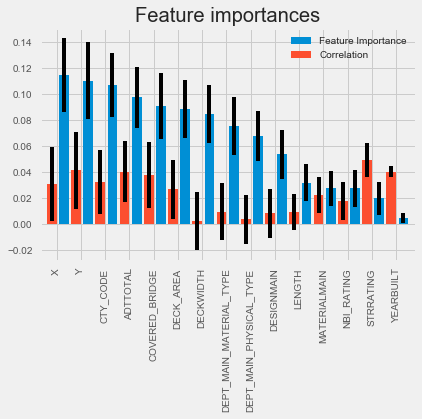

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
plt.style.use('fivethirtyeight')

def feature_importance_eda(X, y):
    
    '''Get an estimate of the feature importance of data'''
    
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    
    #For correlation comparison
    data = pd.concat([X, y], axis=1)
    d = abs(data.corr().iloc[:,-1][:-1])
    
    features = []
    columns = []
    for f, col in enumerate(X.columns):
        print("%d. feature %s (%f)" % (f + 1, col, importances[indices[f]]))
        feature = [col, importances[indices[f]], d[col]]
        features.append(feature)
        columns.append(col)
    
    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar([(x+0.5)*2 for x in range(X.shape[1])], importances[indices],
            yerr=std[indices], label='Feature Importance')
    
    plt.bar([(x* 2) for x in range(X.shape[1])], d[indices],
            yerr=std[indices], label='Correlation')
    plt.rcParams.update({'font.size': 20})
    plt.xticks([(x*2)+0.4 for x in range(X.shape[1])], columns, rotation='vertical')
    plt.xlim([-1, (2 * X.shape[1])])
    plt.legend()
    plt.show()
    return pd.DataFrame(features, columns=['Feature', 'Importance', 'Correlation'])


#Run function
feature_importance = feature_importance_eda(X, y)

In [76]:
def evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) #accuracy score of model
    con = confusion_matrix(y_test, y_pred) #make a confusion matrix
    crep = classification_report(y_test, y_pred)  #create classification report
    
    print con
    print crep
    
    return acc

In [86]:
y_train.shape

(4842, 15)

In [101]:
rfparams = {'n_estimators':[3, 5, 10, 25, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


rfgs = GridSearchCV(rf, rfparams, n_jobs=-1, cv=5)
rfgs.fit(X_train,y_train)

print rfgs.best_params_
print rfgs.best_score_
print evaluate_model(rfgs)
print rfgs.best_estimator_
#Models['rfgs'] = {'Model':rfgs.best_estimator_,
#                  'Evaluate':evaluate_model(rfgs)}

{'min_samples_split': 2, 'n_estimators': 25, 'criterion': 'entropy', 'max_depth': None, 'class_weight': None}
0.997005369682
[[4826    3]
 [  11    2]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      4829
        1.0       0.40      0.15      0.22        13

avg / total       1.00      1.00      1.00      4842

0.997108632796
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [102]:
dfpa_1.NBI_RATING.value_counts()

0.0    17421
1.0     3606
2.0     3183
Name: NBI_RATING, dtype: int64

In [16]:
dfpa3['NBI_RATING'] = dfpa3['NBI_RATING'].replace({0:'NO', 1:'YES'})

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
dfpa_3['NBI_RATING'] = dfpa_3['NBI_RATING'].replace({2:1})

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
dfpa_1['NBI_RATING'] = dfpa_1['NBI_RATING'].replace({2:1})

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [267]:
X = dfpa_1.drop(['NBI_RATING', 'CUSTODIAN', 'BRIDGE_ID'], axis = 1)
y = dfpa_1.NBI_RATING

Feature ranking:
1. feature X (0.319182)
2. feature Y (0.086858)
3. feature CTY_CODE (0.071051)
4. feature ADTTOTAL (0.069860)
5. feature COVERED_BRIDGE (0.066849)
6. feature DECK_AREA (0.060944)
7. feature DECKWIDTH (0.055436)
8. feature DEPT_MAIN_MATERIAL_TYPE (0.055189)
9. feature DEPT_MAIN_PHYSICAL_TYPE (0.052098)
10. feature DESIGNMAIN (0.045848)
11. feature HISTSIGN (0.033258)
12. feature LENGTH (0.031237)
13. feature MATERIALMAIN (0.018756)
14. feature STATE_LOCAL (0.016065)
15. feature STRRATING (0.015681)
16. feature YEARBUILT (0.001385)
17. feature YEARRECON (0.000301)


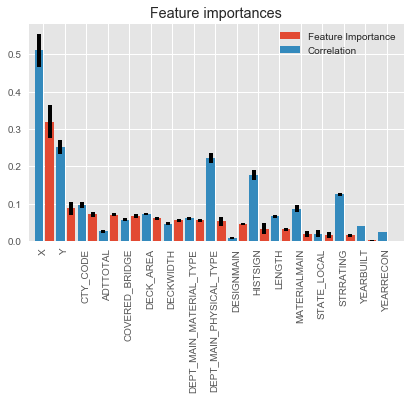

In [268]:
feature_importance = feature_importance_eda(X, y)

In [115]:
rfparams = {'n_estimators':[3, 5, 10, 25, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


rfgs = GridSearchCV(rf, rfparams, n_jobs=-1, cv=5)
rfgs.fit(X_test,y_test)

print rfgs.best_params_
print rfgs.best_score_
print evaluate_model(rfgs)
print rfgs.best_estimator_
#Models['rfgs'] = {'Model':rfgs.best_estimator_,
#                  'Evaluate':evaluate_model(rfgs)}

{'min_samples_split': 5, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': None, 'class_weight': 'balanced'}
0.875671210244
[[3338  133]
 [ 396  975]]
             precision    recall  f1-score   support

        0.0       0.89      0.96      0.93      3471
        1.0       0.88      0.71      0.79      1371

avg / total       0.89      0.89      0.89      4842

0.890747624948
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [269]:
X = dfpa_1.drop(['NBI_RATING', 'CUSTODIAN', 'BRIDGE_ID'], axis = 1)
y = dfpa_1.NBI_RATING
rfparams = {'n_estimators':[10, 25, 50,100, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [1, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


rfgs = GridSearchCV(rf, rfparams, n_jobs=-1,scoring = 'roc_auc', cv=10)
rfgs.fit(X,y)

print rfgs.best_params_
print rfgs.best_score_
print evaluate_model(rfgs)
print rfgs.best_estimator_

{'min_samples_split': 2, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 5, 'class_weight': None}
0.907718830479
[[3446   25]
 [ 683  688]]
             precision    recall  f1-score   support

        0.0       0.83      0.99      0.91      3471
        1.0       0.96      0.50      0.66      1371

avg / total       0.87      0.85      0.84      4842

0.853779429988
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [1]:
def retest(model):
    rtsc = cross_val_score(model, X, y, cv=StratifiedKFold(y, shuffle=True),n_jobs=-1)
    sc = rtsc.std()
    m = rtsc.mean()
    return m, sc

In [2]:
retest(rf)

NameError: name 'rf' is not defined

In [131]:
X_gb = dfpa_1.drop(['STATE_LOCAL', 'CUSTODIAN', 'BRIDGE_ID', 'NBI_RATING'], axis = 1)

In [141]:
xgb = XGBClassifier()
xgb.fit(X_test,y_test)
preds = xgb.predict_proba(X_gb)[:,1]
preds

array([ 0.39914486,  0.02513125,  0.28970024, ...,  0.75830233,
        0.22247905,  0.2055856 ], dtype=float32)

In [232]:
eda_helper(dfma)
#renaming all values into the PA numerical reference guide

,data_type,null_count,unique_count
Latitude,{float64},0,6004
Longitude,{float64},0,6004
Structure_Material,{float64},0,10
Structure_Type,{int64},0,20
Town,{str},0,342
Bridge_Owner,{int64},0,2
Bridge_Identification_Number__B,{str},0,6058
Year_Built,{int64},0,169
Year_Reconstructed,{int64},0,107
Structure_Length,{float64},0,1051


In [197]:
dfma.Bridge_Owner.value_counts()

1    4201
0    3353
Name: Bridge_Owner, dtype: int64

In [228]:
dfma.Structurally_Deficient.value_counts()
#1346 NO, 150 YES


NO     5455
YES     603
Name: Structurally_Deficient, dtype: int64

In [223]:
dfmau = dfma.Structurally_Deficient

In [187]:
dfma.Structurally_Deficient.UNKNOWN = np.random.randint(0,1)

In [227]:
dfma = dfma[dfma.Structurally_Deficient != 'UNKNOWN']

In [233]:
#dfma.Structurally_Deficient
#sdef =[]
# df_bag = dfma.Structurally_Deficient[[(np.random.randint(0, 1)) if x != 'UNKNOWN' else np.random.randint(0, 1)np.random.in df.index]]

In [231]:
dfma.Structurally_Deficient = dfma.Structurally_Deficient.replace({'YES':1, 'NO':0})

In [202]:
dfma.Structure_Category.value_counts()

1    5086
2    1639
3     829
Name: Structure_Category, dtype: int64

In [201]:
dfma.Structure_Category = dfma.Structure_Category.replace({'Bridge (NBI)': 1, 'Short Span Bridge':2, 'Culvert':3})

In [171]:
dfma.Structure_Material.value_counts()

1.0    2948
2.0    1868
3.0     950
4.0     607
0.0     447
5.0     317
6.0     162
7.0     124
8.0      86
9.0      45
Name: Structure_Material, dtype: int64

In [169]:
dfma.Structure_Material = dfma.Structure_Material.replace({'Steel':1, 'Concrete':2, 'Prestressed concrete':3, 'Steel continuous':4, 
         'Masonry':5, 'Concrete continuous':6, 'Prestressed concrete continuous':7, 'Wood or Timber':8,
                     'Aluminum, Wrought Iron, or Cast Iron':9,'Other':0, '-':0})
dfma.Structure_Material = dfma.Structure_Material.astype(float)

In [176]:
dfma.Structure_Type.value_counts()

2     3025
19    1655
1      894
0      439
11     439
4      252
5      226
6      164
7      145
3      110
10      84
21      57
16      17
12      15
9       14
17       6
20       6
15       2
14       2
22       1
13       1
Name: Structure_Type, dtype: int64

In [175]:
dfma.Structure_Type = dfma.Structure_Type.replace({'Stringer/Multi-beam or Girder':2, 'Culvert (includes frame culverts)':19, 
                                                   'Slab':1, 'Arch - Deck':11, 'Tee Beam':4, 
                                                   'Box Beam or Girders - Multiple':5, 
                                                   'Box Beam or Girders - Single or Spread':6, 'Frame (except frame culverts)':7,
                                                    'Girder and Floorbeam System':3,'Other':0, '-':0,
                                                  'Truss - Thru':10,'Segmental Box Girder':21,'Movable - Bascule':16,
                                                   'Arch - Thru':12,'Truss - Deck':9,'Mixed types':20,
                                                  'Movable - Swing':17,'Stayed Girder':14,'Movable - Lift':15,
                                                   'Suspension':13,'Channel Beam':22,})


In [180]:
dfma['Bridge_Owner'] = [1 if x == 'DOT' else 0 for x in dfma.Bridge_Owner]

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [238]:
Xma = dfma.drop(['Structurally_Deficient', 'Town','Bridge_Identification_Number__B'], axis = 1)
yma = dfma.Structurally_Deficient

In [256]:
Xma = dfma.drop(['Structurally_Deficient', 'Town','Bridge_Identification_Number__B'], axis = 1)
yma = dfma.Structurally_Deficient
rfparams = {'n_estimators':[10, 25, 50,100, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [1, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


rfgs = GridSearchCV(rf, rfparams, n_jobs=-1,scoring = 'roc_auc', cv=10)
rfgs.fit(Xma,yma)

print rfgs.best_params_
print rfgs.best_score_
print evaluate_model(rfgs)
print rfgs.best_estimator_

{'min_samples_split': 5, 'n_estimators': 300, 'criterion': 'entropy', 'max_depth': 5, 'class_weight': None}
0.803718756297
[[3446   25]
 [ 684  687]]
             precision    recall  f1-score   support

        0.0       0.83      0.99      0.91      3471
        1.0       0.96      0.50      0.66      1371

avg / total       0.87      0.85      0.84      4842

0.853572903759
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [260]:
from sklearn.model_selection import cross_val_predict

In [262]:
proba = cross_val_predict(rfgs, Xma, yma, cv=3, method='predict_proba')
proba

array([[ 0.88354287,  0.11645713],
       [ 0.94786378,  0.05213622],
       [ 0.91776808,  0.08223192],
       ..., 
       [ 0.97891088,  0.02108912],
       [ 0.98642342,  0.01357658],
       [ 0.99432566,  0.00567434]])

Feature ranking:
1. feature Latitude (0.203346)
2. feature Longitude (0.200804)
3. feature Structure_Material (0.199937)
4. feature Structure_Type (0.175006)
5. feature Bridge_Owner (0.067238)
6. feature Year_Built (0.064692)
7. feature Year_Reconstructed (0.055793)
8. feature Structure_Length (0.021950)
9. feature Structure_Category (0.011234)


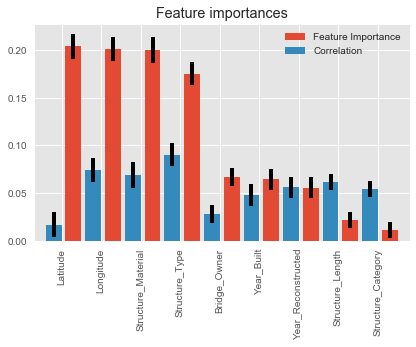

In [241]:
feature_importance = feature_importance_eda(Xma, yma)

In [287]:
Xpa.shape,ypa.shape

((30364, 10), (30364,))

In [290]:
eda_helper(dfpa_3)

,data_type,null_count,unique_count
X,{float64},0,30288
Y,{float64},0,30094
BRIDGE_ID,"{int, str}",0,30364
DEPT_MAIN_MATERIAL_TYPE,{float64},0,9
DESIGNMAIN,{float64},0,20
LENGTH,{float64},0,1036
MATERIALMAIN,{float64},0,10
NBI_RATING,{float64},0,3
STATE_LOCAL,{int64},0,2
STRRATING,{float64},0,9


Feature ranking:
1. feature X (0.353983)
2. feature Y (0.121289)
3. feature DEPT_MAIN_MATERIAL_TYPE (0.116956)
4. feature DESIGNMAIN (0.108366)
5. feature LENGTH (0.096012)
6. feature MATERIALMAIN (0.076711)
7. feature STATE_LOCAL (0.044567)
8. feature STRRATING (0.036543)
9. feature YEARBUILT (0.025249)
10. feature YEARRECON (0.020325)


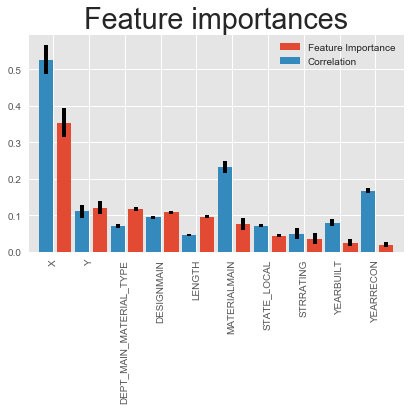

In [294]:
feature_importance = feature_importance_eda(Xpa, ypa)

In [292]:
Xpa = dfpa_3.drop(['NBI_RATING','BRIDGE_ID'], axis = 1)
ypa = dfpa_3.NBI_RATING

In [293]:
rfparams = {'n_estimators':[10, 25, 50,100, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [1, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


rfgs = GridSearchCV(rf, rfparams, n_jobs=-1,scoring = 'roc_auc', cv=10)
rfgs.fit(Xpa,ypa)

print rfgs.best_params_
print rfgs.best_score_
print evaluate_model(rfgs)
print rfgs.best_estimator_

{'min_samples_split': 5, 'n_estimators': 300, 'criterion': 'gini', 'max_depth': 5, 'class_weight': None}
0.907353928542
[[3446   25]
 [ 686  685]]
             precision    recall  f1-score   support

        0.0       0.83      0.99      0.91      3471
        1.0       0.96      0.50      0.66      1371

avg / total       0.87      0.85      0.84      4842

0.853159851301
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [ ]:
Results, aim/methods, success criteria, data dictionary/cleaning, feature and model selection

Aim:
The goal of this project is to understand the process leading up the depreciation of bridges, and the differences between states based off a multitude of factors.

Data Cleaning: For our cleaning process, we examined both sets of data and then based off the table information guide provided by PENNDOT I converted both systems to a similar scale. For my PA exclusive model, I kept more features that I believe may have an influence on the depreciation of a bridge such as city code and average daily traffic. My score noticeably went up for PA in the MA/PA comparison whcih means that my second model is more than likely underfitting and by removing features I am removing features which can be enlightening towards depreciation.

Success Criteria: 
I wanted to see if I could narrow down the predictors to determine whether or not a bridge which would become deficient and if there would be a substantial difference between states. I was actually hoping for a larger discrepancy, and then attempt to see why. We were able to determine influential factors, and see discrepancy depending on size so for now I'll deem it a success!

For my model selection, I went with random forests. For the amount of features I wanted to incorporate this seemed like the best choice for incorporating all of them.

Current Results: Are that my geographical component has the largest influence on my model, followed by city code and average daily traffic. The 3rd and 4th category make quite a bit of sense to me as city budgets can determine which bridges/infrastructure gets focused on in a given year and may be ignored for a period of time. High daily traffic can also influence which bridges are more likely to fall faster. Latitude and longitude are interesting in that I didn't believe they would have as high of an influence as they ended up having, especially that it would carry over into massachusetts as well. More research necessary to determine actual effects.